In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("indicator8_2014_1.xlsx")

In [4]:
df.head()

,"Average Global Temperature, 1880-2013",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Year,Temperature,NaN,NaN,NaN
2,NaN,Degrees Fahrenheit,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1880,56.822,NaN,NaN,NaN


In [5]:
df.tail()

,"Average Global Temperature, 1880-2013",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
136,2012,58.244,NaN,NaN,NaN
137,2013,58.298,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN
139,Source: Compiled by Earth Policy Institute fro...,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [6]:
# Add parameters to fix various problems.
df = pd.read_excel("indicator8_2014_1.xlsx", index_col=0, usecols="A:B",
                   skiprows=4, skipfooter=3,
                   parse_dates=True, names=["Date","Temp"])

In [7]:
df.head()

,Temp
Date,
1880-01-01,56.822
1881-01-01,56.984
1882-01-01,56.912
1883-01-01,56.876
1884-01-01,56.732


In [8]:
df.tail()

,Temp
Date,
2009-01-01,58.280
2010-01-01,58.406
2011-01-01,58.190
2012-01-01,58.244
2013-01-01,58.298


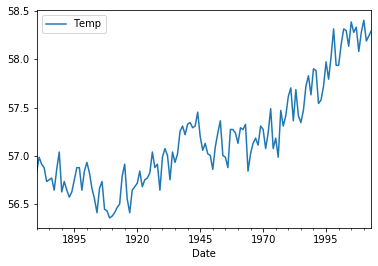

In [9]:
df.plot()

In [10]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

Rather than treat the average temperature over a particular year has happening at a particular time stamp, instead we could consider the average temperature to be happening over a particular ***time period***.  Python can distinguish between the two.

In [11]:
df.index = df.index.to_period('Y')

In [13]:
type(df.index[0])

pandas._libs.tslibs.period.Period

In [14]:
df.head()

,Temp
Date,
1880,56.822
1881,56.984
1882,56.912
1883,56.876
1884,56.732


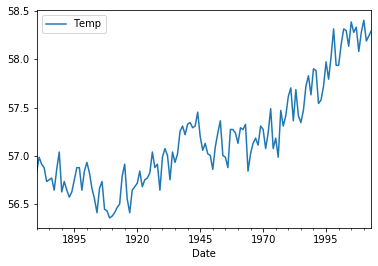

In [15]:
df.plot()

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
model = ExponentialSmoothing(df)

In [18]:
# This is simple exponential smoothing.
fit = model.fit()
fit.summary()

Dep. Variable:,endog,No. Observations:,134
Model:,ExponentialSmoothing,SSE,3.828
Optimized:,True,AIC,-472.428
Trend:,None,BIC,-466.632
Seasonal:,None,AICC,-472.118
Seasonal Periods:,None,Date:,"Wed, 10 Mar 2021"
Box-Cox:,False,Time:,23:15:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4601695,alpha,True
initial_level,56.871623,l.0,True


In [19]:
dfhat = fit.predict(0,len(df)+20)

<Figure size 432x288 with 0 Axes>

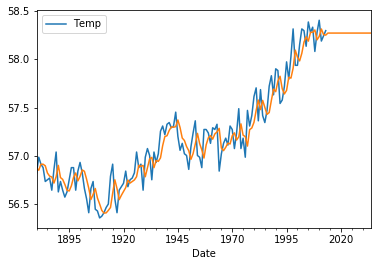

In [20]:
plt.figure()
df.plot()
dfhat.plot()

In [21]:
# This is Holt with trend (also called double exponential smoothing).
# But here the best fit turned out to be a constant trend.
model = ExponentialSmoothing(df, trend="additive")
fit = model.fit()
fit.summary()

Dep. Variable:,endog,No. Observations:,134
Model:,ExponentialSmoothing,SSE,3.750
Optimized:,True,AIC,-471.195
Trend:,Additive,BIC,-459.604
Seasonal:,None,AICC,-470.534
Seasonal Periods:,None,Date:,"Wed, 10 Mar 2021"
Box-Cox:,False,Time:,23:15:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4156884,alpha,True
smoothing_slope,0.000000,beta,True


<Figure size 432x288 with 0 Axes>

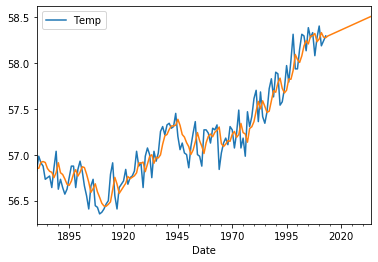

In [22]:
dfhat = fit.predict(0,len(df)+20)
plt.figure()
df.plot()
dfhat.plot()

In [23]:
# The "Pyramid ARIMA" package has a R-style "auto.arima" function.  To install:
# pip install pmdarima
import pmdarima as pm

In [24]:
fit = pm.auto_arima(df)  # auto_arima returns a fitted model

In [25]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:               SARIMAX(1, 1, 3)   Log Likelihood                  53.392
Date:                Wed, 10 Mar 2021   AIC                            -94.784
Time:                        23:15:32   BIC                            -77.441
Sample:                             0   HQIC                           -87.736
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0216      0.010      2.129      0.033       0.002       0.041
ar.L1         -0.9478      0.063    -14.969      0.000      -1.072      -0.824
ma.L1          0.5644      0.112      5.054      0.000       0.346       0.783
ma.L2         -0.5824      0.095     -6.154      0.000      -0.768      -0.397
ma.L3         -0.2821      0.091     -3.101      0.002      -0.460      -0.104
sigma2         0.0261      0.004      6.888      0.000       0.019       0.034
===================================================================================
Ljung-Box (Q):                       39.46   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.49   Prob(JB):                         0.41
Heteroskedasticity (H):               1.55   Skew:                            -0.09
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
forecasts = pd.Series(fit.predict(100), index=pd.period_range('2014', periods=100, freq='Y'))

In [27]:
forecasts.head()

2014    58.287975
2015    58.319309
2016    58.317231
2017    58.340785
2018    58.340045
Freq: A-DEC, dtype: float64

<Figure size 432x288 with 0 Axes>

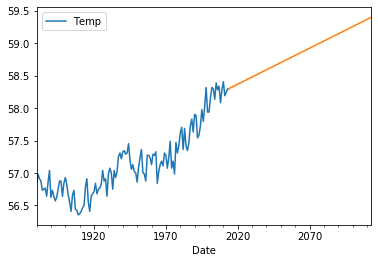

In [28]:
plt.figure()
df.plot()
forecasts.plot()

In [29]:
# We can also use "predict" to return confidence intervals.
fit.predict(100, return_conf_int=True)

(array([58.28797495, 58.31930892, 58.31723148, 58.34078499, 58.34004505,
        58.36233085, 58.36279247, 58.38393942, 58.38548047, 58.40560432,
        58.40811507, 58.42731981, 58.43070171, 58.44908077, 58.45324527,
        58.47088256, 58.47575011, 58.49272105, 58.49822019, 58.51459249,
        58.52065903, 58.53649354, 58.5430698 , 58.55842119, 58.56545536,
        58.58037273, 58.58781827, 58.60234574, 58.61016084, 58.62433803,
        58.63248513, 58.64634765, 58.654793  , 58.66837284, 58.67708611,
        58.690412  , 58.69936598, 58.71246373, 58.72163394, 58.73452673,
        58.7438912 , 58.75659988, 58.76613886, 58.77868213, 58.78837789,
        58.80077257, 58.81060916, 58.82287035, 58.83283346, 58.84497473,
        58.85505151, 58.86708505, 58.87726394, 58.88920069, 58.89947131,
        58.91132113, 58.92167415, 58.93344586, 58.94387291, 58.95557445,
        58.96606802, 58.97770652, 58.98825983, 58.9998417 , 59.01044868,
        59.02197968, 59.03263489, 59.04412018, 59.0

In [30]:
forecasts = pd.DataFrame(fit.predict(100, return_conf_int=True)[1], 
                         index=pd.period_range('2014', periods=100, freq='Y'))

In [31]:
forecasts.head()

,0,1
2014,57.971311,58.604639
2015,57.947287,58.691330
2016,57.924485,58.709978
2017,57.934934,58.746636
2018,57.915479,58.764611


<Figure size 432x288 with 0 Axes>

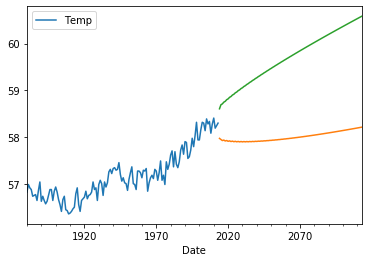

In [32]:
plt.figure()
df.plot()
forecasts[0].plot()
forecasts[1].plot()

In [33]:
# Let's fit a trend stationary rather than difference stationary model.
fit = pm.auto_arima(df, d=0, suppress_warnings=True, trend="ct")
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:               SARIMAX(3, 0, 3)   Log Likelihood                  53.958
Date:                Wed, 10 Mar 2021   AIC                            -89.916
Time:                        23:17:28   BIC                            -63.836
Sample:                             0   HQIC                           -79.318
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.8362      6.228      1.258      0.208      -4.370      20.042
drift          0.0018      0.001      1.512      0.131      -0.001       0.004
ar.L1          0.1448      0.477      0.303      0.762      -0.791       1.080
ar.L2          0.3471      0.519      0.669      0.504      -0.670       1.365
ar.L3          0.3695      0.332      1.114      0.265      -0.281       1.020
ma.L1          0.3589      0.469      0.765      0.444      -0.560       1.278
ma.L2         -0.1600      0.406     -0.395      0.693      -0.955       0.635
ma.L3         -0.3735      0.185     -2.020      0.043      -0.736      -0.011
sigma2         0.0261      0.004      6.699      0.000       0.018       0.034
===================================================================================
Ljung-Box (Q):                       41.37   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.41   Prob(JB):                         0.28
Heteroskedasticity (H):               1.42   Skew:                            -0.26
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 432x288 with 0 Axes>

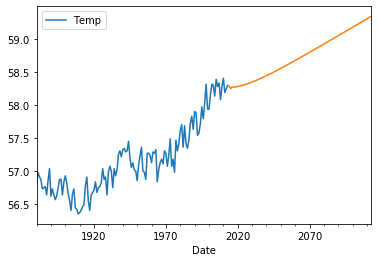

In [34]:
forecasts = pd.Series(fit.predict(100), index=pd.period_range('2014', periods=100, freq='Y'))
plt.figure()
df.plot()
forecasts.plot()

<Figure size 432x288 with 0 Axes>

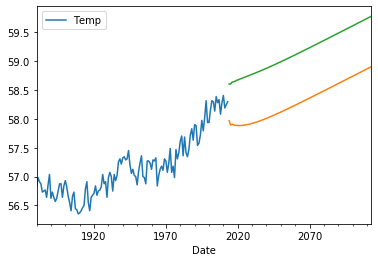

In [35]:
forecasts = pd.DataFrame(fit.predict(100, return_conf_int=True)[1], 
                         index=pd.period_range('2014', periods=100, freq='Y'))
plt.figure()
df.plot()
forecasts[0].plot()
forecasts[1].plot()

Note that forecast confidence intervals for the trend stationary model don't get bigger (in contrast with the difference stationary model).